In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'crime.csv'  
crime_data = pd.read_csv(file_path)

crime_data.head()


,month,Total_crimes,Serious,Huge_damage,Ecological,Terrorism,Extremism,Murder,Harm_to_health,Rape,Theft,Vehicle_theft,Fraud_scam,Hooligan,Drugs,Weapons
0,01.01.2003,214587.0,88203.0,20162.0,1216.0,630.0,13.0,2749.0,5559.0,574.0,81014.0,3549.0,7731.0,10560.0,16006.0,4661.0
1,01.02.2003,221928.0,88863.0,20889.0,1701.0,678.0,5.0,2444.0,4732.0,515.0,95970.0,3697.0,7607.0,10816.0,16839.0,5364.0
2,01.03.2003,248452.0,101349.0,24053.0,1817.0,809.0,10.0,2864.0,4851.0,560.0,79420.0,4327.0,9437.0,11813.0,20176.0,5938.0
3,01.04.2003,236299.0,91625.0,19754.0,2449.0,892.0,10.0,2919.0,4722.0,668.0,95215.0,5345.0,7824.0,12636.0,16614.0,5230.0
4,01.05.2003,230931.0,89615.0,17519.0,3530.0,796.0,20.0,2713.0,4895.0,688.0,94505.0,6374.0,7122.0,12234.0,14413.0,5112.0


In [6]:
crime_data['month'] = pd.to_datetime(crime_data['month'], format='%d.%m.%Y')

crime_data['year'] = crime_data['month'].dt.year

crime_data.isnull().sum()

month             0
Total_crimes      0
Serious           0
Huge_damage       0
Ecological        0
Terrorism         0
Extremism         0
Murder            0
Harm_to_health    0
Rape              0
Theft             0
Vehicle_theft     0
Fraud_scam        0
Hooligan          0
Drugs             0
Weapons           0
year              0
dtype: int64

# Гипотеза:

"Количество преступлений, связанных с наркотиками, коррелирует с общим уровнем преступности, но их доля снижается с годами."

# Анализ и визуализация данных

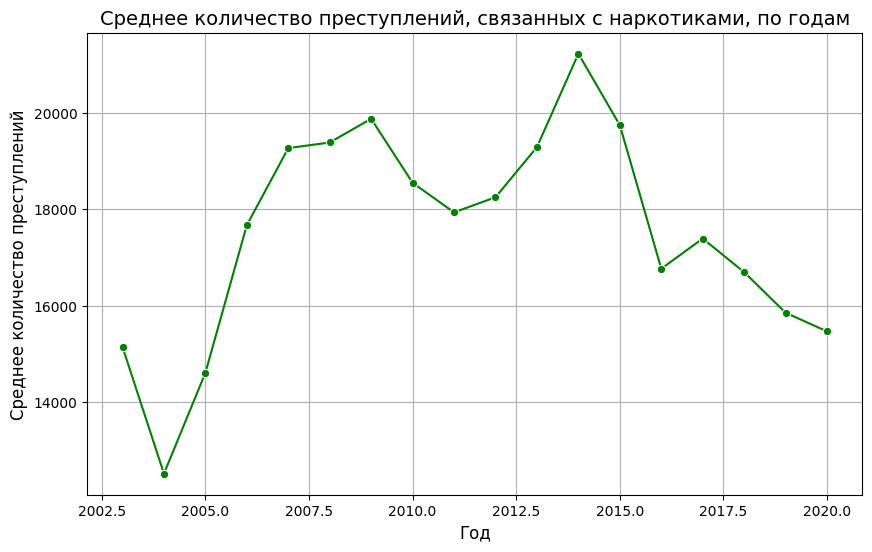

In [7]:
# Вычисляем среднее количество преступлений по годам
avg_drugs_per_year = crime_data.groupby('year')['Drugs'].mean()

# Построение линейного графика
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_drugs_per_year.index, y=avg_drugs_per_year.values, marker="o", color="green")
plt.title("Среднее количество преступлений, связанных с наркотиками, по годам", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Среднее количество преступлений", fontsize=12)
plt.grid(visible=True)
plt.show()


# Корреляция между преступлениями, связанными с наркотиками, и общим уровнем преступности

In [8]:
# Вычисляем корреляцию
correlation_drugs_total = crime_data['Drugs'].corr(crime_data['Total_crimes'])
print(f"Корреляция между преступлениями, связанными с наркотиками, и общим уровнем преступности: {correlation_drugs_total:.2f}")


Корреляция между преступлениями, связанными с наркотиками, и общим уровнем преступности: 0.09


# Зависимость между преступлениями, связанными с наркотиками, и общим уровнем преступности

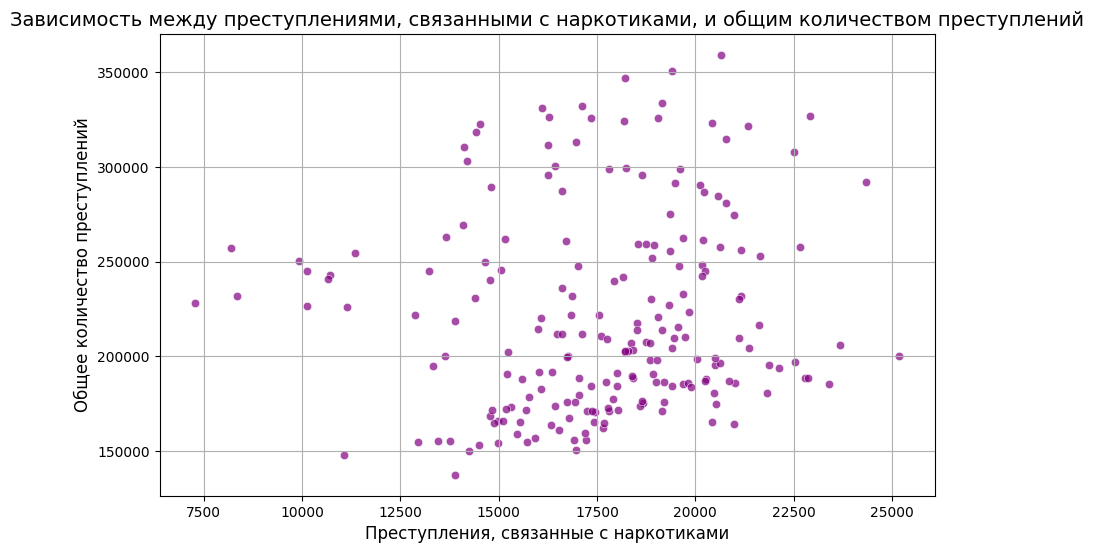

In [9]:
# Построение scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=crime_data['Drugs'],
    y=crime_data['Total_crimes'],
    alpha=0.7, color="purple"
)
plt.title("Зависимость между преступлениями, связанными с наркотиками, и общим количеством преступлений", fontsize=14)
plt.xlabel("Преступления, связанные с наркотиками", fontsize=12)
plt.ylabel("Общее количество преступлений", fontsize=12)
plt.grid(visible=True)
plt.show()


# Дополнительный анализ: Доля преступлений, связанных с наркотиками, от общего количества

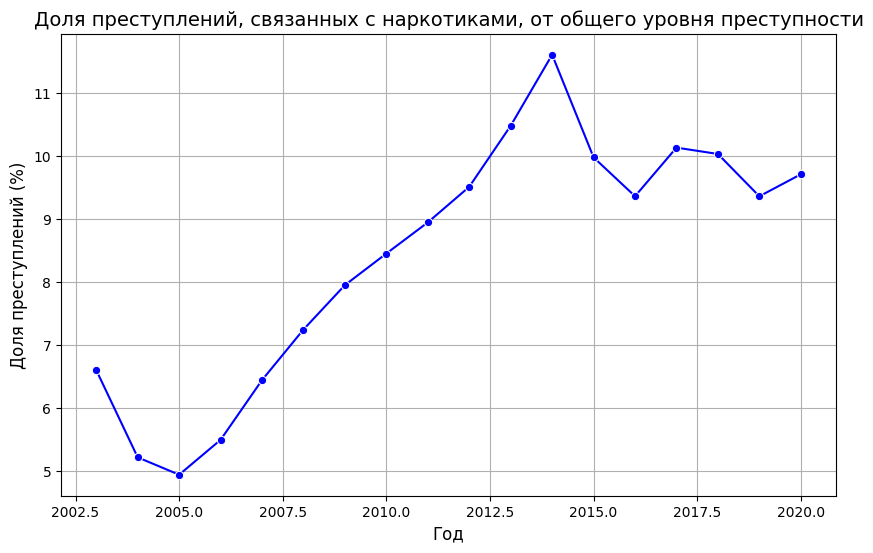

In [10]:
# Доля преступлений, связанных с наркотиками, от общего количества
crime_data['Drugs_share'] = (crime_data['Drugs'] / crime_data['Total_crimes']) * 100

# Средняя доля преступлений по годам
avg_drugs_share_per_year = crime_data.groupby('year')['Drugs_share'].mean()

# Построение графика
plt.figure(figsize=(10, 6))
sns.lineplot(x=avg_drugs_share_per_year.index, y=avg_drugs_share_per_year.values, marker="o", color="blue")
plt.title("Доля преступлений, связанных с наркотиками, от общего уровня преступности", fontsize=14)
plt.xlabel("Год", fontsize=12)
plt.ylabel("Доля преступлений (%)", fontsize=12)
plt.grid(visible=True)
plt.show()
